In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importando os dados para o Jupyter
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Limpeza e inspeção dos dados**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [5]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

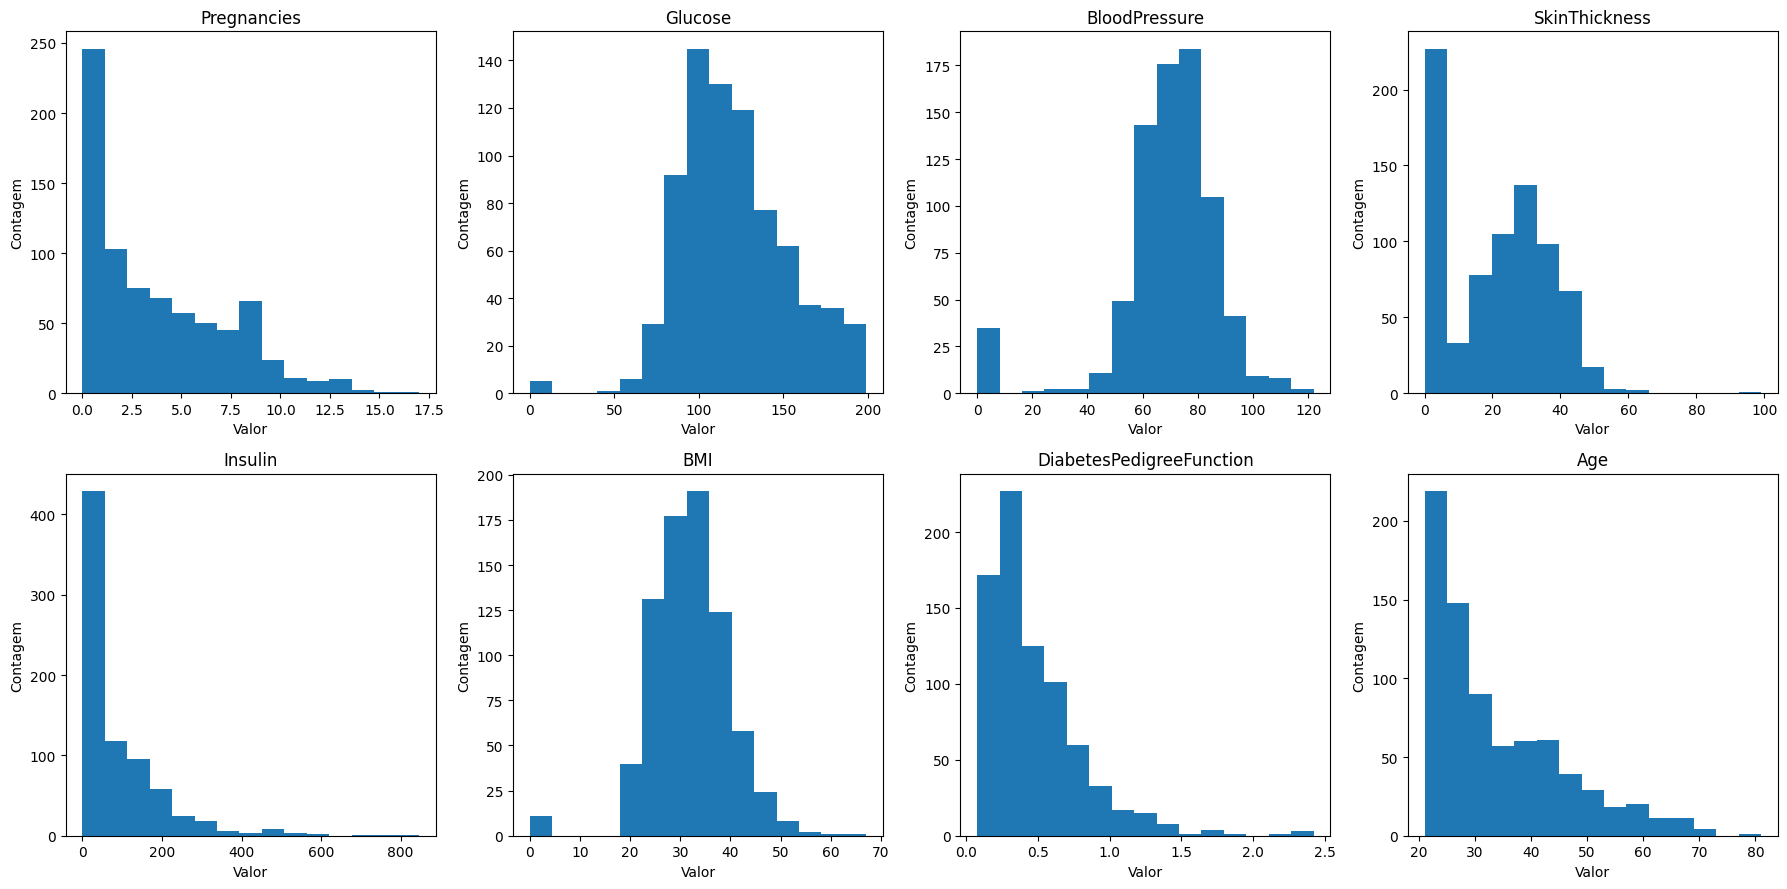

In [7]:
f,ax = plt.subplots(2,4,figsize=(18,9))
ax = ax.ravel()
for x in np.arange(df.shape[1]-1):
    ax[x].hist(df[df.columns[x]],bins=15)
    ax[x].set_title(df.columns[x])
    ax[x].set_xlabel('Valor')
    ax[x].set_ylabel('Contagem')
plt.tight_layout()

<Axes: >

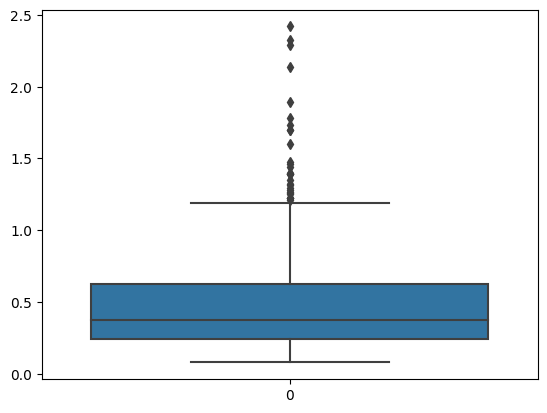

In [8]:
sns.boxplot(df['DiabetesPedigreeFunction'])

<Axes: >

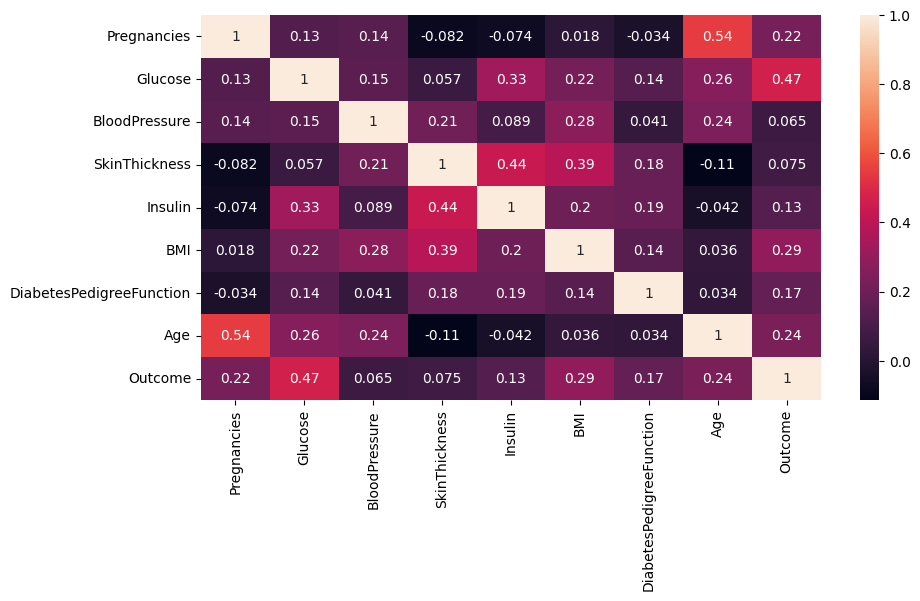

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

retirar colunas: BloodPressure e SkinThickness.

**Transformação dos dados para ultilizar na regressão logistica**

In [10]:
df.drop(axis=1,columns=['BloodPressure','SkinThickness'],inplace=True)

In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
#lista dos novos valores
level_gluc = []
blood_pressure = []
age = []
weight = []
Diabet_PF = []


#Glicose
for i in df['Glucose']:
    if i < 100:
        level_gluc.append('normal')
    elif i < 126:
        level_gluc.append('pre_diabetes')
    else:
        level_gluc.append('hyperglycaemia')

    
#Fase da idade
for i in df['Age']:
    if i < 40:
        age.append('adult')
    elif i < 60:
        age.append('middle-age')
    else:
        age.append('old')


#Faixa de peso
for i in df['BMI']:
    if i < 18:
        weight.append('underweight')
    elif i < 25:
        weight.append('normal')
    elif i < 30:
        weight.append('overweight')
    elif i < 35:
        weight.append('obese')
    else:
        weight.append('extremely_obese')


#Probabilidade Diabete segundo familia e idade
for i in df['DiabetesPedigreeFunction']:
    if i <= 0.5:
        Diabet_PF.append('low')
    else:
        Diabet_PF.append('high')

In [13]:
df['Glucose'] = level_gluc
df['Age'] = age
df['BMI'] = weight
df['DiabetesPedigreeFunction'] = Diabet_PF

In [14]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,hyperglycaemia,0,obese,high,middle-age,1
1,1,normal,0,overweight,low,adult,0
2,8,hyperglycaemia,0,normal,high,adult,1
3,1,normal,94,overweight,low,adult,0
4,0,hyperglycaemia,168,extremely_obese,high,adult,1


In [15]:
df_d = pd.get_dummies(df)

In [16]:
df_d.head()

,Pregnancies,Insulin,Outcome,Glucose_hyperglycaemia,Glucose_normal,Glucose_pre_diabetes,BMI_extremely_obese,BMI_normal,BMI_obese,BMI_overweight,BMI_underweight,DiabetesPedigreeFunction_high,DiabetesPedigreeFunction_low,Age_adult,Age_middle-age,Age_old
0,6,0,1,True,False,False,False,False,True,False,False,True,False,False,True,False
1,1,0,0,False,True,False,False,False,False,True,False,False,True,True,False,False
2,8,0,1,True,False,False,False,True,False,False,False,True,False,True,False,False
3,1,94,0,False,True,False,False,False,False,True,False,False,True,True,False,False
4,0,168,1,True,False,False,True,False,False,False,False,True,False,True,False,False
